In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
#reading the service tickets data from local machine
service_data=pd.read_csv('C:/Users/Satwik/Downloads/hackathons/endava_email_tickets_ML.csv')

In [4]:
service_data.head()

,title,body,ticket_type,category,sub_category1,sub_category2,business_service,urgency,impact
0,NaN,hi since recruiter lead permission approve req...,1,4,2,21,71,3,4
1,connection with icon,icon dear please setup icon per icon engineers...,1,6,22,7,26,3,4
2,work experience user,work experience user hi work experience studen...,1,5,13,7,32,3,4
3,requesting for meeting,requesting meeting hi please help follow equip...,1,5,13,7,32,3,4
4,reset passwords for external accounts,re expire days hi ask help update passwords co...,1,4,2,76,4,3,4


In [5]:
len(service_data)

48549

In [10]:
service_data.category.value_counts()

4     34061
5      9634
6      2628
7       921
11      612
8       239
9       191
3       137
1        72
12       45
0         4
2         3
10        2
Name: category, dtype: int64

In [7]:
service_data['num_words'] = service_data.body.apply(lambda x : len(x.split()))

In [11]:
#trying to bin each document number of words like bins=[0,50,75, np.inf]
service_data['bins']=pd.cut(service_data.num_words, bins=[0,100,300,500,800, np.inf], labels=['0-100', '100-300', '300-500','500-800' ,'>800'])

In [12]:
#count of documents under each bin
word_distribution = service_data.groupby('bins').size().reset_index().rename(columns={0:'counts'})

In [13]:
#checking the word distribution count
word_distribution.head()

,bins,counts
0,0-100,44672
1,100-300,3477
2,300-500,305
3,500-800,76
4,>800,19


### most of the documents body description are within 100 words

Text(0.5, 1.0, 'Word distribution per bin')

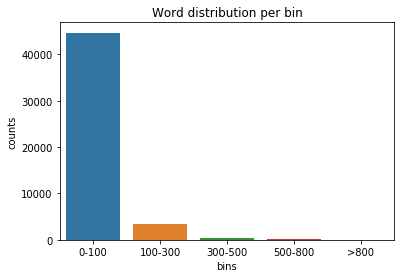

In [14]:
 
sns.barplot(x='bins', y='counts', data=word_distribution).set_title("Word distribution per bin")

### Text parsing, Topic Modelling gensim

In [15]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
#Visualisation
import matplotlib.pyplot as plt
from IPython.display import display

#nltk
from nltk.stem import WordNetLemmatizer
from nltk import tokenize

C:\Users\Satwik\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [16]:
service_data_body_array=service_data.body.values

In [17]:
#Using scikit-learn
count_vec = CountVectorizer(stop_words="english", analyzer='word', 
                            ngram_range=(1, 1), max_df=1, min_df=1, max_features=None)

# tokenizing, learning vocabulary and converting text data into term-frequency matrix
service_data_body_description = count_vec.fit_transform(service_data_body_array)

#getting idf, initailizing
tfidf_transformer = TfidfTransformer()

# convert term-frequency matrix into tf-idf
tfidf_matrix = tfidf_transformer.fit_transform(service_data_body_description)

# create dictionary to find a tfidf word each word
word2tfidf = dict(zip(count_vec.get_feature_names(), tfidf_transformer.idf_))

#printing the idf score for each word in the document
for word, score in word2tfidf.items():
    print(word, score)

abbott 11.097202293159526
abbreviations 11.097202293159526
abo 11.097202293159526
aboard 11.097202293159526
absolute 11.097202293159526
absorption 11.097202293159526
absurd 11.097202293159526
absurdly 11.097202293159526
academic 11.097202293159526
accelerates 11.097202293159526
acceptation 11.097202293159526
accessability 11.097202293159526
accommodated 11.097202293159526
accompanied 11.097202293159526
accomplishment 11.097202293159526
accountancy 11.097202293159526
accrues 11.097202293159526
accumulator 11.097202293159526
accustomed 11.097202293159526
aced 11.097202293159526
achiever 11.097202293159526
acknowledgements 11.097202293159526
actin 11.097202293159526
actuality 11.097202293159526
actualize 11.097202293159526
actuarial 11.097202293159526
adaptation 11.097202293159526
additive 11.097202293159526
adduce 11.097202293159526
adit 11.097202293159526
adjusts 11.097202293159526
administering 11.097202293159526
administrated 11.097202293159526
administrating 11.097202293159526
admini

crunchy 11.097202293159526
crush 11.097202293159526
crushes 11.097202293159526
cryptic 11.097202293159526
cryptography 11.097202293159526
culpa 11.097202293159526
cultivated 11.097202293159526
culture 11.097202293159526
cultures 11.097202293159526
cumulus 11.097202293159526
cure 11.097202293159526
curie 11.097202293159526
curser 11.097202293159526
curses 11.097202293159526
curtain 11.097202293159526
customary 11.097202293159526
cycled 11.097202293159526
cyclist 11.097202293159526
cylinder 11.097202293159526
cypher 11.097202293159526
cypress 11.097202293159526
czar 11.097202293159526
dailies 11.097202293159526
dairy 11.097202293159526
damaging 11.097202293159526
damn 11.097202293159526
dance 11.097202293159526
dancer 11.097202293159526
darling 11.097202293159526
dart 11.097202293159526
daunting 11.097202293159526
dbms 11.097202293159526
deaf 11.097202293159526
dealers 11.097202293159526
dealership 11.097202293159526
debates 11.097202293159526
debating 11.097202293159526
debrief 11.09720

fried 11.097202293159526
friendlier 11.097202293159526
friendship 11.097202293159526
frontal 11.097202293159526
frontiers 11.097202293159526
frowned 11.097202293159526
froze 11.097202293159526
fruit 11.097202293159526
fruitless 11.097202293159526
frustratingly 11.097202293159526
fuel 11.097202293159526
fulfillers 11.097202293159526
fulfills 11.097202293159526
fuller 11.097202293159526
fullest 11.097202293159526
fundamentally 11.097202293159526
funky 11.097202293159526
funnel 11.097202293159526
funnily 11.097202293159526
furthers 11.097202293159526
fusions 11.097202293159526
fuss 11.097202293159526
fussed 11.097202293159526
futuristic 11.097202293159526
futurists 11.097202293159526
fuzes 11.097202293159526
fuzz 11.097202293159526
gab 11.097202293159526
gadget 11.097202293159526
gadgets 11.097202293159526
gait 11.097202293159526
gallop 11.097202293159526
gals 11.097202293159526
gang 11.097202293159526
gaols 11.097202293159526
garbo 11.097202293159526
gardening 11.097202293159526
gardens 

magician 11.097202293159526
magnetic 11.097202293159526
maiden 11.097202293159526
mailings 11.097202293159526
maim 11.097202293159526
maiming 11.097202293159526
mainframes 11.097202293159526
mainline 11.097202293159526
maintainability 11.097202293159526
maintenances 11.097202293159526
maize 11.097202293159526
majors 11.097202293159526
malaria 11.097202293159526
malformed 11.097202293159526
malfunctioned 11.097202293159526
mama 11.097202293159526
manifested 11.097202293159526
manipulated 11.097202293159526
manipulation 11.097202293159526
manipulations 11.097202293159526
manitoba 11.097202293159526
manuals 11.097202293159526
marginally 11.097202293159526
mariner 11.097202293159526
marital 11.097202293159526
markup 11.097202293159526
maroon 11.097202293159526
marquee 11.097202293159526
marshal 11.097202293159526
marvelous 11.097202293159526
massachusetts 11.097202293159526
massages 11.097202293159526
massaging 11.097202293159526
masse 11.097202293159526
masses 11.097202293159526
mat 11.09

punctual 11.097202293159526
punctually 11.097202293159526
pup 11.097202293159526
purged 11.097202293159526
purifiers 11.097202293159526
pushover 11.097202293159526
putted 11.097202293159526
pyramid 11.097202293159526
quadruple 11.097202293159526
qualifications 11.097202293159526
quandary 11.097202293159526
quebec 11.097202293159526
quelling 11.097202293159526
questioned 11.097202293159526
questor 11.097202293159526
quests 11.097202293159526
queueing 11.097202293159526
queuing 11.097202293159526
quire 11.097202293159526
quito 11.097202293159526
quits 11.097202293159526
race 11.097202293159526
racecourse 11.097202293159526
rage 11.097202293159526
rake 11.097202293159526
raking 11.097202293159526
rally 11.097202293159526
ramifications 11.097202293159526
ramped 11.097202293159526
rancid 11.097202293159526
ransack 11.097202293159526
ransacks 11.097202293159526
rapids 11.097202293159526
rapport 11.097202293159526
rara 11.097202293159526
rascal 11.097202293159526
rase 11.097202293159526
ratif

specialize 11.097202293159526
specializes 11.097202293159526
specializing 11.097202293159526
specialty 11.097202293159526
speculative 11.097202293159526
sped 11.097202293159526
speeches 11.097202293159526
speedup 11.097202293159526
spell 11.097202293159526
spices 11.097202293159526
spiders 11.097202293159526
spill 11.097202293159526
spilling 11.097202293159526
spinner 11.097202293159526
spited 11.097202293159526
spitfire 11.097202293159526
spitting 11.097202293159526
splinters 11.097202293159526
spokes 11.097202293159526
sponsored 11.097202293159526
spoof 11.097202293159526
sporting 11.097202293159526
sportsmen 11.097202293159526
spotlight 11.097202293159526
spotty 11.097202293159526
springboard 11.097202293159526
springboards 11.097202293159526
spurs 11.097202293159526
sputa 11.097202293159526
squared 11.097202293159526
squares 11.097202293159526
squash 11.097202293159526
squirrel 11.097202293159526
sri 11.097202293159526
stabile 11.097202293159526
stabilize 11.097202293159526
stabili

wizards 11.097202293159526
woke 11.097202293159526
wonders 11.097202293159526
woodmen 11.097202293159526
workloads 11.097202293159526
workout 11.097202293159526
worrisome 11.097202293159526
wraps 11.097202293159526
wrist 11.097202293159526
writable 11.097202293159526
wrongful 11.097202293159526
wrongfully 11.097202293159526
xenon 11.097202293159526
xxi 11.097202293159526
yabber 11.097202293159526
yangtze 11.097202293159526
yeas 11.097202293159526
yell 11.097202293159526
yesterdays 11.097202293159526
yield 11.097202293159526
yields 11.097202293159526
yoke 11.097202293159526
yore 11.097202293159526
younger 11.097202293159526
yugoslavia 11.097202293159526
zeppelin 11.097202293159526
zeros 11.097202293159526
zeus 11.097202293159526
zipping 11.097202293159526
zn 11.097202293159526
zooming 11.097202293159526
zori 11.097202293159526


In [18]:
#printing the unique id when reading the vocab while fitting count vectorizer
term_frequency = count_vec.vocabulary_
print(term_frequency)

{'campus': 386, 'injector': 1470, 'matte': 1725, 'hammer': 1298, 'muffin': 1827, 'revalidated': 2419, 'moderated': 1800, 'voltages': 3136, 'renditions': 2350, 'standoffs': 2733, 'screwdriver': 2535, 'torque': 2952, 'registries': 2311, 'certainty': 437, 'serous': 2566, 'vatic': 3102, 'homeworker': 1360, 'searchable': 2544, 'chunks': 476, 'bombard': 286, 'stall': 2729, 'contrasting': 623, 'tomorrows': 2948, 'bars': 210, 'concentrated': 575, 'reinvigorate': 2326, 'pioneers': 2063, 'stylus': 2773, 'springboards': 2713, 'springboard': 2712, 'tuition': 3005, 'isles': 1547, 'cardholders': 402, 'assures': 156, 'delinquencies': 758, 'inherits': 1468, 'earnings': 923, 'gadgets': 1216, 'yeas': 3202, 'writable': 3195, 'sifting': 2609, 'soled': 2669, 'throat': 2922, 'intermediary': 1514, 'outlay': 1947, 'stacks': 2724, 'riot': 2448, 'reflux': 2298, 'redux': 2284, 'thrift': 2920, 'compositions': 567, 'brave': 319, 'treater': 2990, 'vigilance': 3120, 'scrip': 2539, 'machete': 1681, 'entrepreneurship'

### Words with rare occurence in the document gets highest score in idf and words with most frequently occurred get low score

In [19]:
#seeing high and low idf scores for words in corpus
sorted_by_idf = np.argsort(tfidf_transformer.idf_)
feature_names = np.array(count_vec.get_feature_names())
print("Features with lowest idf:\n{}".format(
       feature_names[sorted_by_idf[:10]]))
print("\nFeatures with highest idf:\n{}".format(
       feature_names[sorted_by_idf[-10:]]))

Features with lowest idf:
['abbott' 'previews' 'priced' 'pricy' 'prim' 'primate' 'priory' 'prise'
 'privet' 'probed']

Features with highest idf:
['faded' 'fades' 'fads' 'faint' 'fairness' 'fakes' 'fallowed' 'familia'
 'facial' 'zori']


In [20]:
# re-assigning the original corpus to new variable for finding count-vectorizer and tf-idf using gensim
reindexed_data= service_data["body"]

data_text = service_data[['body']]
data_text['index'] = data_text.index
documents=data_text.copy()


print(len(documents))
print(documents[:5])



48549
                                                body  index
0  hi since recruiter lead permission approve req...      0
1  icon dear please setup icon per icon engineers...      1
2  work experience user hi work experience studen...      2
3  requesting meeting hi please help follow equip...      3
4  re expire days hi ask help update passwords co...      4


C:\Users\Satwik\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


### trying to create tf idf and bow using gensim which does by topic modelling 

In [21]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import nltk


In [25]:
# functions for finding root words maintaining the inflections after double time checking 
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [26]:
##checking stemming by tokenizing and finding root words
stemmer = PorterStemmer()
doc_sample = documents[documents['index'] == 5].values[0][0]
print('original document: ')
doc_sample=documents[documents['index'] == 5].values[0][0]
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document: 
['verification', 'warning', 'hi', 'has', 'got', 'attached', 'please', 'addresses', 'best', 'regards', 'monitoring', 'analyst', 'verification', 'warning']


 tokenized and lemmatized document: 
['verif', 'warn', 'attach', 'address', 'best', 'regard', 'monitor', 'analyst', 'verif', 'warn']


In [27]:
#finding root words to the entire corpus
processed_docs = documents['body'].map(preprocess)
processed_docs[:5]

0    [recruit, lead, permiss, approv, requisit, mak...
1    [icon, dear, setup, icon, icon, engin, detail,...
2    [work, experi, user, work, experi, student, co...
3    [request, meet, help, follow, equip, cabl, cor...
4    [expir, day, help, updat, password, colleagu, ...
Name: body, dtype: object

In [28]:
#initialising gensim corpora dictionary on tokenized root words
dictionary = gensim.corpora.Dictionary(processed_docs)
#printing the 10 unique ids and words
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 approv
1 lead
2 make
3 permiss
4 recruit
5 requisit
6 thank
7 dear
8 detail
9 engin
10 icon


In [29]:
#filtering out the tokens that appear in
#less than no_below 15 documents or
# more than 0.5 fraction of totol corpus size documents.
#after (1) and (2), keep only the first most frequent tokens (or keep all if None).
#implementing BoW on the gensim dictionary for finding topics
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[123]

[(0, 1),
 (7, 1),
 (18, 2),
 (26, 1),
 (28, 2),
 (29, 5),
 (35, 11),
 (56, 1),
 (59, 1),
 (71, 6),
 (84, 5),
 (85, 1),
 (89, 1),
 (91, 1),
 (92, 2),
 (99, 3),
 (107, 1),
 (109, 1),
 (124, 1),
 (136, 3),
 (143, 2),
 (145, 1),
 (149, 1),
 (150, 2),
 (156, 16),
 (158, 1),
 (163, 1),
 (190, 2),
 (202, 10),
 (203, 1),
 (215, 1),
 (235, 5),
 (253, 2),
 (263, 1),
 (278, 2),
 (280, 1),
 (282, 16),
 (287, 1),
 (293, 1),
 (313, 1),
 (318, 1),
 (319, 1),
 (324, 1),
 (340, 4),
 (345, 1),
 (357, 1),
 (365, 1),
 (373, 1),
 (376, 1),
 (383, 1),
 (442, 2),
 (458, 1),
 (464, 1),
 (509, 1),
 (571, 1),
 (585, 1),
 (657, 1),
 (716, 1),
 (721, 1),
 (739, 1),
 (740, 1),
 (741, 16),
 (742, 1),
 (743, 1),
 (744, 1),
 (745, 1),
 (746, 1)]

In [30]:
#Preview Bag Of Words for our sample preprocessed document.
bow_doc_123 = bow_corpus[123]
for i in range(len(bow_doc_123)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_123[i][0], 
                                               dictionary[bow_doc_123[i][0]], 
bow_doc_123[i][1]))

Word 0 ("approv") appears 1 time.
Word 7 ("detail") appears 1 time.
Word 18 ("work") appears 2 time.
Word 26 ("request") appears 1 time.
Word 28 ("activ") appears 2 time.
Word 29 ("best") appears 5 time.
Word 35 ("close") appears 11 time.
Word 56 ("issu") appears 1 time.
Word 59 ("log") appears 1 time.
Word 71 ("regard") appears 6 time.
Word 84 ("analyst") appears 5 time.
Word 85 ("attach") appears 1 time.
Word 89 ("anymor") appears 1 time.
Word 91 ("kind") appears 1 time.
Word 92 ("look") appears 2 time.
Word 99 ("card") appears 3 time.
Word 107 ("error") appears 1 time.
Word 109 ("friday") appears 1 time.
Word 124 ("prod") appears 1 time.
Word 136 ("tuesday") appears 3 time.
Word 143 ("absenc") appears 2 time.
Word 145 ("action") appears 1 time.
Word 149 ("countri") appears 1 time.
Word 150 ("date") appears 2 time.
Word 156 ("leav") appears 16 time.
Word 158 ("past") appears 1 time.
Word 163 ("record") appears 1 time.
Word 190 ("hello") appears 2 time.
Word 202 ("assign") appears 10 

In [31]:
#TF-IDF, printing the scores 
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.17292971048228067),
 (1, 0.1952915654258252),
 (2, 0.30632481285788143),
 (3, 0.24819355264410153),
 (4, 0.8199977068851184),
 (5, 0.3226845981181564)]


In [32]:
#for inference of topic distribution on corpus
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=5, id2word=dictionary, passes=2, workers=2)

In [33]:
# Print the results 
import pickle

# assigning num_of topics needed and number of words needed in each topic
result = lda_model.print_topics(num_topics=5, num_words=5)
print(result)

for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

[(0, '0.024*"chang" + 0.020*"send" + 0.014*"regard" + 0.011*"import" + 0.011*"detail"'), (1, '0.029*"site" + 0.020*"meet" + 0.016*"purchas" + 0.015*"order" + 0.014*"regard"'), (2, '0.036*"send" + 0.028*"issu" + 0.019*"access" + 0.016*"regard" + 0.013*"hello"'), (3, '0.050*"send" + 0.034*"approv" + 0.022*"error" + 0.020*"submit" + 0.018*"leav"'), (4, '0.042*"regard" + 0.042*"hello" + 0.021*"tuesday" + 0.021*"kind" + 0.019*"wednesday"')]
Topic: 0 
Words: 0.024*"chang" + 0.020*"send" + 0.014*"regard" + 0.011*"import" + 0.011*"detail" + 0.011*"file" + 0.010*"hello" + 0.010*"access" + 0.009*"report" + 0.009*"task"
Topic: 1 
Words: 0.029*"site" + 0.020*"meet" + 0.016*"purchas" + 0.015*"order" + 0.014*"regard" + 0.014*"room" + 0.013*"work" + 0.012*"licens" + 0.012*"request" + 0.011*"dear"
Topic: 2 
Words: 0.036*"send" + 0.028*"issu" + 0.019*"access" + 0.016*"regard" + 0.013*"hello" + 0.013*"work" + 0.012*"connect" + 0.011*"error" + 0.010*"problem" + 0.010*"updat"
Topic: 3 
Words: 0.050*"send"

In [34]:
# saving the file
with open("lda_topics_result.txt", "w") as f:
    for s in result:
        f.write(str(s) +"\n")


In [35]:
#showing the top 25 words in each topic id 
from collections import OrderedDict

data_lda = {i: OrderedDict(lda_model.show_topic(i,25)) for i in range(5)}

In [36]:
df_lda = pd.DataFrame(data_lda)
print(df_lda.shape)
df_lda = df_lda.fillna(0).T
print(df_lda.shape)

(86, 5)
(5, 86)


In [37]:
df_lda

,access,action,administr,analyst,annual,approv,assign,attach,best,cabl,...,test,thursday,ticket,tri,tuesday,updat,want,wednesday,week,work
0,0.009811,0.000000,0.000000,0.000000,0.000000,0.000000,0.006886,0.000000,0.006350,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.005687,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.010517,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008904,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008434,0.000000,0.000000,0.012566
2,0.018703,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.007761,0.008115,0.000000,0.010142,0.000000,0.000000,0.000000,0.012759
3,0.000000,0.009232,0.000000,0.000000,0.007507,0.033548,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007809,0.000000
4,0.000000,0.000000,0.000000,0.014161,0.000000,0.000000,0.009061,0.013615,0.014424,0.000000,...,0.00868,0.017812,0.000000,0.000000,0.020747,0.000000,0.000000,0.018582,0.000000,0.000000


In [38]:
#displaying the same in visual form
import pyLDAvis.gensim

lda_display = pyLDAvis.gensim.prepare(lda_model, bow_corpus,dictionary, sort_topics=True)
pyLDAvis.display(lda_display)

C:\Users\Satwik\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


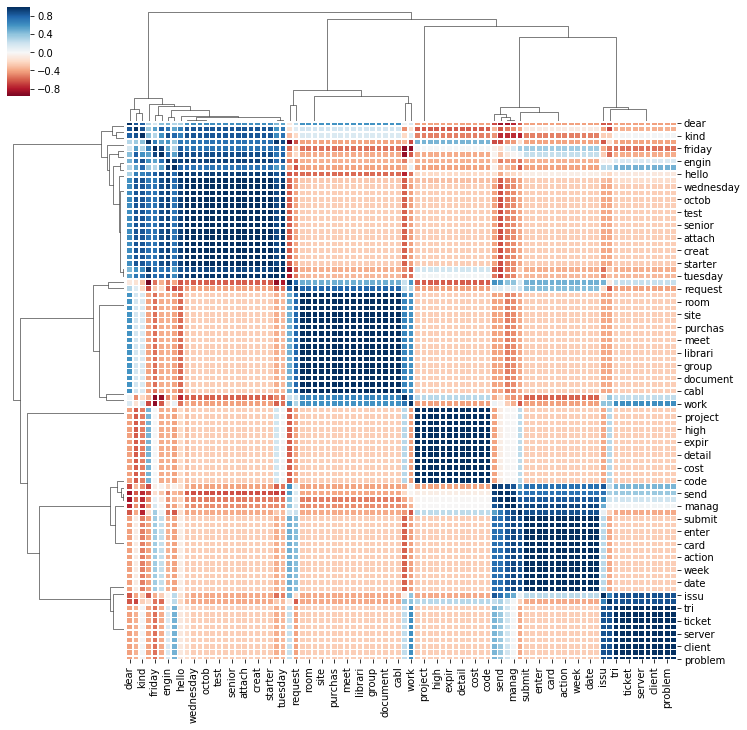

In [39]:
#Plotted the correlation between words
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

g=sns.clustermap(df_lda.corr(), center=0, cmap="RdBu", metric='cosine', linewidths=.75, figsize=(12, 12))
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()


In [52]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, Dense, Dropout, Embedding, LSTM, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

MAX_LENGTH = 500
tokenizer = Tokenizer()
tokenizer.fit_on_texts(service_data_body_array)
post_seq = tokenizer.texts_to_sequences(service_data_body_array)
post_seq_padded = pad_sequences(post_seq, maxlen=MAX_LENGTH)

In [55]:
#for fitting model to predict ticket category
num_class = len(np.unique(service_data.category.values))
y = service_data['category'].values

In [56]:
X_train, X_test, y_train, y_test = train_test_split(post_seq_padded, y, test_size=0.3,random_state=42)

In [57]:
vocab_size = len(tokenizer.word_index) + 1

### Simple Deep learning model

In [58]:
inputs = Input(shape=(MAX_LENGTH, ))
embedding_layer = Embedding(vocab_size,
                            128,
                            input_length=MAX_LENGTH)(inputs)
x = Flatten()(embedding_layer)
x = Dense(32, activation='relu')(x)

predictions = Dense(num_class, activation='softmax')(x)
model = Model(inputs=[inputs], outputs=predictions)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

model.summary()
filepath="weights-simple.hdf5"
checkpointer = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
history = model.fit([X_train], batch_size=64, y=to_categorical(y_train), verbose=1, validation_split=0.25, 
          shuffle=True, epochs=10, callbacks=[checkpointer])

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 500)]             0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 500, 128)          1569152   
_________________________________________________________________
flatten_1 (Flatten)          (None, 64000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2048032   
_________________________________________________________________
dense_2 (Dense)              (None, 13)                429       
Total params: 3,617,613
Trainable params: 3,617,613
Non-trainable params: 0
_________________________________________________________________
Train on 25488 samples, validate on 8496 samples
Epoch 1/10
25472/25488 [============================>.] - ETA: 0s - 

### Accuracy of 0.81 is achieved in classifying the categories from with flatten layer

In [59]:
predicted = model.predict(X_test)
predicted = np.argmax(predicted, axis=1)
accuracy_score(y_test, predicted)

C:\Users\Satwik\Anaconda3\lib\site-packages\tensorflow_core\python\keras\engine\training_v2_utils.py:364: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  if isinstance(inputs, collections.Sequence):


0.8140061791967045

In [62]:
# This utility function is from the sklearn docs: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=25)
    plt.xlabel('Predicted label', fontsize=25)


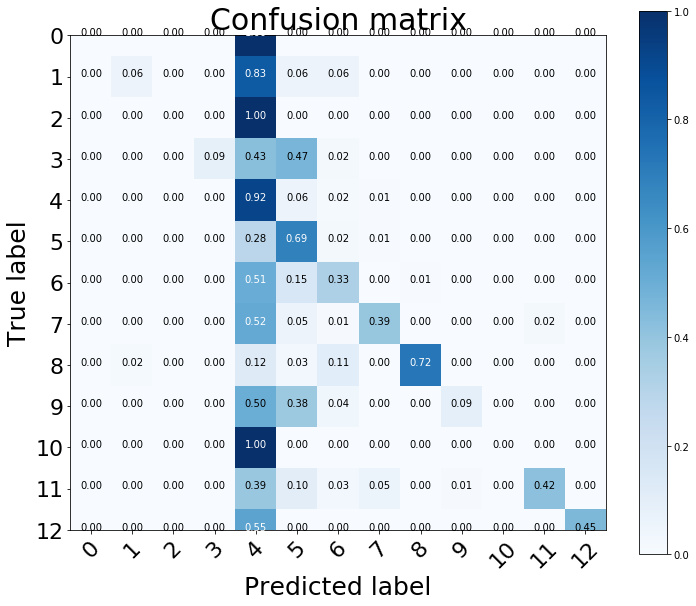

In [72]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
import itertools
encoder = LabelEncoder()
encoder.fit(service_data.category.values)
text_labels = encoder.classes_ 
cnf_matrix = confusion_matrix(y_test, predicted)
plt.figure(figsize=(12,10))
plot_confusion_matrix(cnf_matrix, classes=text_labels, title="Confusion matrix")
plt.show()

### RNN LSTM model

In [73]:
inputs = Input(shape=(MAX_LENGTH, ))
embedding_layer = Embedding(vocab_size,
                            128,
                            input_length=MAX_LENGTH)(inputs)

x = LSTM(64)(embedding_layer)
x = Dense(32, activation='relu')(x)
predictions = Dense(num_class, activation='softmax')(x)
model_lstm = Model(inputs=[inputs], outputs=predictions)
model_lstm.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

model_lstm.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 500)]             0         
_________________________________________________________________
embedding_4 (Embedding)      (None, 500, 128)          1569152   
_________________________________________________________________
lstm (LSTM)                  (None, 64)                49408     
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 13)                429       
Total params: 1,621,069
Trainable params: 1,621,069
Non-trainable params: 0
_________________________________________________________________


In [74]:
filepath="weights.hdf5"
checkpointer = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
history = model_lstm.fit([X_train], batch_size=64, y=to_categorical(y_train), verbose=1, validation_split=0.25, 
          shuffle=True, epochs=20, callbacks=[checkpointer])

Train on 25488 samples, validate on 8496 samples
Epoch 1/20
25472/25488 [============================>.] - ETA: 0s - loss: 0.8020 - acc: 0.7690
Epoch 00001: val_acc improved from -inf to 0.80850, saving model to weights.hdf5
25488/25488 [==============================] - 189s 7ms/sample - loss: 0.8021 - acc: 0.7690 - val_loss: 0.6326 - val_acc: 0.8085
Epoch 2/20
25472/25488 [============================>.] - ETA: 0s - loss: 0.5388 - acc: 0.8349
Epoch 00002: val_acc improved from 0.80850 to 0.82933, saving model to weights.hdf5
25488/25488 [==============================] - 186s 7ms/sample - loss: 0.5388 - acc: 0.8349 - val_loss: 0.5454 - val_acc: 0.8293
Epoch 3/20
25472/25488 [============================>.] - ETA: 0s - loss: 0.4370 - acc: 0.8623
Epoch 00003: val_acc improved from 0.82933 to 0.83157, saving model to weights.hdf5
25488/25488 [==============================] - 188s 7ms/sample - loss: 0.4369 - acc: 0.8623 - val_loss: 0.5495 - val_acc: 0.8316
Epoch 4/20
25472/25488 [======

In [75]:
model_lstm.load_weights('weights.hdf5')
predicted = model_lstm.predict(X_test)

In [76]:
predicted

array([[7.36345442e-07, 1.74631117e-04, 2.17896115e-07, ...,
        5.52127410e-08, 6.49100969e-07, 3.96818723e-06],
       [1.72098789e-05, 1.78295781e-03, 3.02480498e-06, ...,
        1.64119410e-06, 3.94248127e-05, 6.97534124e-05],
       [7.61444369e-07, 2.26259217e-04, 3.34310215e-07, ...,
        1.02235759e-07, 1.51244387e-06, 1.11828140e-05],
       ...,
       [1.59069646e-06, 3.30609590e-04, 8.25656514e-07, ...,
        2.33618962e-07, 2.83266331e-06, 2.08351539e-05],
       [4.21273796e-07, 1.94854118e-04, 3.99022184e-07, ...,
        1.06259627e-07, 4.01898524e-06, 1.73211756e-05],
       [1.00488060e-05, 5.02912037e-04, 5.16232285e-06, ...,
        1.39044107e-06, 1.15393595e-04, 2.73958518e-04]], dtype=float32)

In [77]:
predicted = np.argmax(predicted, axis=1)

### With lstm 0.83 accuracy is reached

In [78]:
accuracy_score(y_test, predicted)

0.8368005492619293

In [79]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00        18
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00        47
           4       0.87      0.94      0.91     10155
           5       0.78      0.71      0.74      2910
           6       0.55      0.37      0.44       835
           7       0.57      0.42      0.48       273
           8       0.90      0.68      0.77        65
           9       0.29      0.07      0.11        56
          10       0.00      0.00      0.00         1
          11       0.62      0.51      0.56       192
          12       0.00      0.00      0.00        11

    accuracy                           0.84     14565
   macro avg       0.35      0.28      0.31     14565
weighted avg       0.82      0.84      0.83     14565



C:\Users\Satwik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Satwik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Satwik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
